## Import neccessary library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc, PrecisionRecallDisplay
import matplotlib.pyplot as plt

##Read Dataset

In [ ]:
df = pd.read_csv("/content/sample_data/SimranDataScience/GroupC/qsar_fish_toxicity.csv")


In [ ]:
#head
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0.0,1,1.453,3.770
1,2.189,0.580,0.863,0.0,0,1.348,3.115
2,2.125,0.638,0.831,0.0,0,1.348,3.531
3,3.027,0.331,1.472,1.0,0,1.807,3.510
4,2.094,0.827,0.860,0.0,0,1.886,5.390


In [ ]:
#tail
df.tail()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
903,2.801,0.728,2.226,0.0,2,0.736,3.109
904,3.652,0.872,0.867,2.0,3,3.983,4.040
905,3.763,0.916,0.878,0.0,6,2.918,4.818
906,2.831,1.393,1.077,0.0,1,0.906,5.317
907,4.057,1.032,1.183,1.0,3,4.754,8.201


##Sanity check of data

In [ ]:
#shape
df.shape

(908, 7)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                906 non-null    float64
 1   SM1_Dz(Z)           906 non-null    float64
 2   GATS1i              906 non-null    float64
 3   NdsCH               907 non-null    float64
 4   NdssC               908 non-null    int64  
 5   MLOGP               905 non-null    float64
 6   LC50 [-LOG(mol/L)]  906 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.8 KB


In [ ]:
df['SM1_Dz(Z)'] = df['SM1_Dz(Z)'].replace(0, np.nan)
print("No of missing values per columns are:")

df.isna().sum()

No of missing values per columns are:


CIC0                   2
SM1_Dz(Z)             38
GATS1i                 2
NdsCH                  1
NdssC                  0
MLOGP                  3
LC50 [-LOG(mol/L)]     2
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

CIC0                  0.220264
SM1_Dz(Z)             4.185022
GATS1i                0.220264
NdsCH                 0.110132
NdssC                 0.000000
MLOGP                 0.330396
LC50 [-LOG(mol/L)]    0.220264
dtype: float64

##### If the percentage of the missing value is above 50% we decide to delete that column so here is no problem there is no any missing value with more than 50% of the overall count

In [ ]:
#Finding duplicates
df.duplicated().sum()

1

In [ ]:
# Dropping duplicates if any
df.drop_duplicates(inplace=True)
# Check shape after dropping duplicates
df.shape


(907, 7)

## Exploratory Data Analysis(EDA)

In [ ]:
#descriptive statistics
df.describe().T
#For dtype=object
#df.descriptive(include="object")

,count,mean,std,min,25%,50%,75%,max
CIC0,905.0,2.899052,0.756528,0.667,2.348,2.937,3.407,5.926
SM1_Dz(Z),869.0,0.654692,0.417867,0.134,0.251,0.580,0.923,2.171
GATS1i,905.0,1.297528,0.412823,0.396,0.951,1.244,1.563,4.980
NdsCH,906.0,0.229581,0.605908,0.000,0.000,0.000,0.000,4.000
NdssC,907.0,0.504961,1.084065,-3.000,0.000,0.000,1.000,20.000
MLOGP,904.0,2.114446,1.480770,-5.780,1.209,2.128,3.109,10.000
LC50 [-LOG(mol/L)],905.0,4.063505,1.457797,0.053,3.151,3.984,4.912,9.612


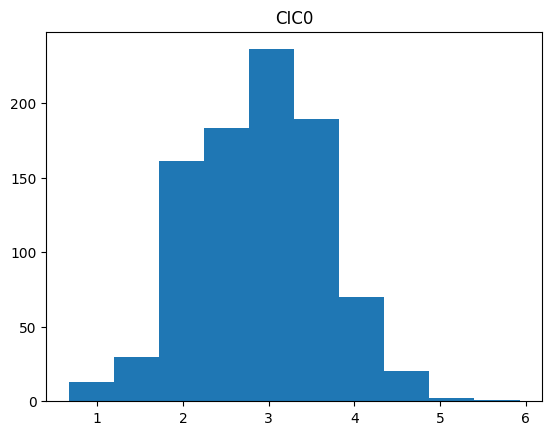

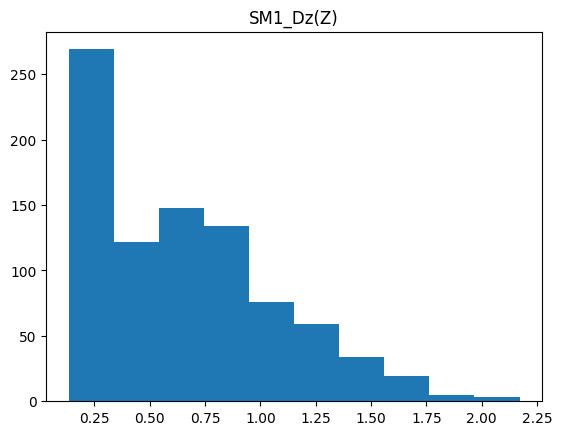

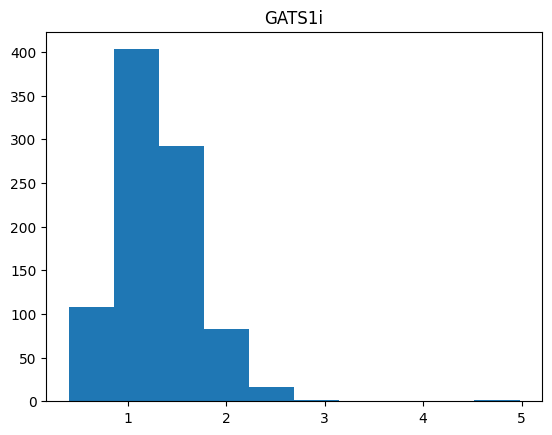

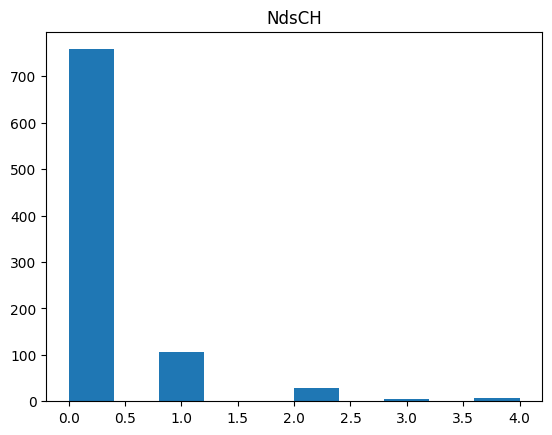

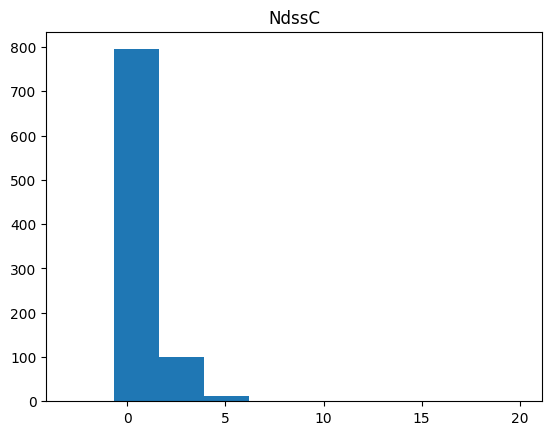

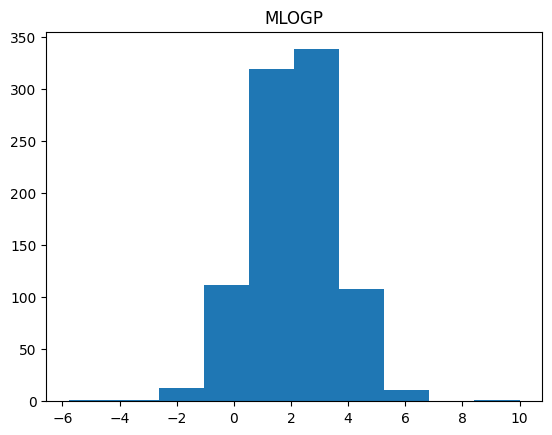

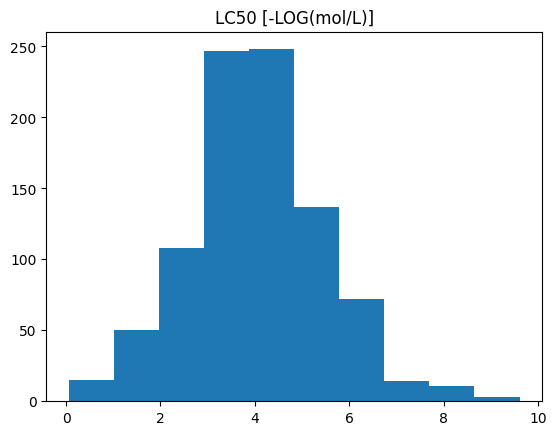

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include=['int64','float64']).columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

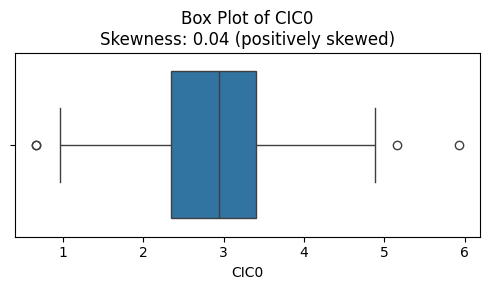

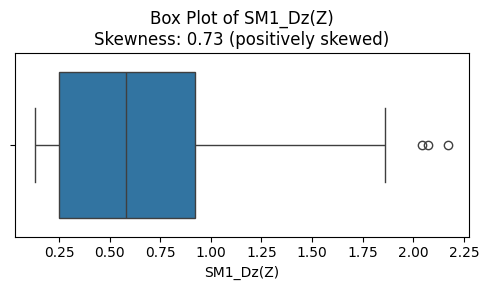

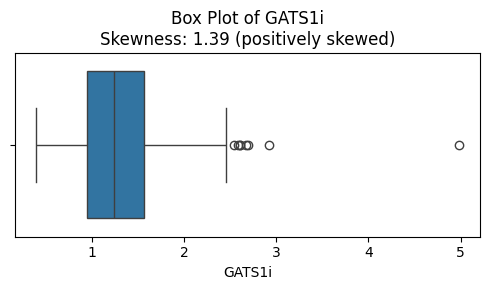

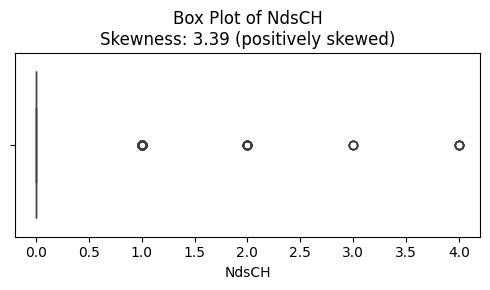

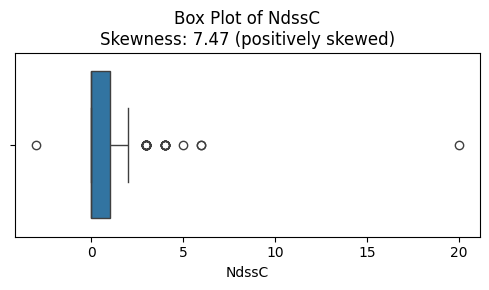

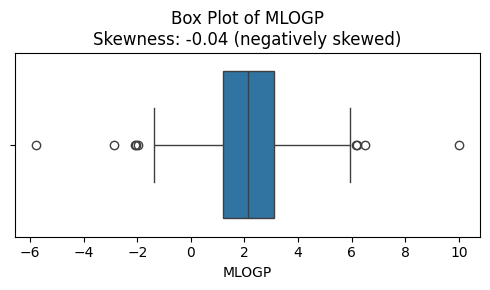

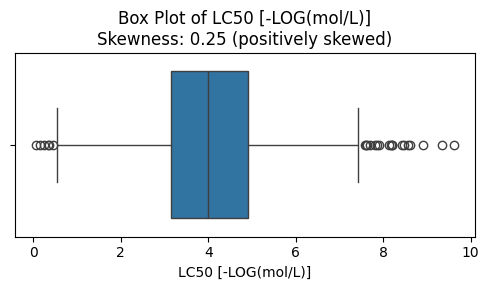

In [ ]:
#Boxplot-to-identify Outliers
import seaborn as sns # Import the Seaborn library
import matplotlib.pyplot as plt
from scipy.stats import skew

# Define the function to plot boxplots and calculate skewness
def plot_boxplots(column):
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[column]) # Now you can use sns.boxplot
    skewness = skew(df[column].dropna())  # Calculate skewness
    skew_type = ('positively skewed' if skewness > 0 else
                 'negatively skewed' if skewness < 0 else
                 'approximately normal')

    plt.title(f'Box Plot of {column}\nSkewness: {skewness:.2f} ({skew_type})')
    plt.tight_layout()
    plt.show()

# List of columns to plot
columns =  ["CIC0","SM1_Dz(Z)","GATS1i","NdsCH","NdssC","MLOGP","LC50 [-LOG(mol/L)]"]

# Plot boxplots for each column
for column in columns:
    plot_boxplots(column)

Observation-
"CIC0","SM1_Dz(Z)","GATS1i","NdsCH","NdssC","LC50 [-LOG(mol/L)]" are positively skewed.
"MLOGP" is negatively skewed.

In [ ]:
#scatter plot to understand the relationship
df.select_dtypes(include=['int64','float64']).columns

Index(['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP',
       'LC50 [-LOG(mol/L)]'],
      dtype='object')

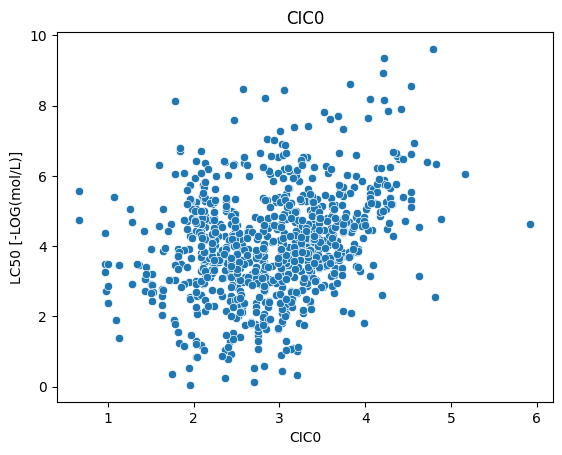

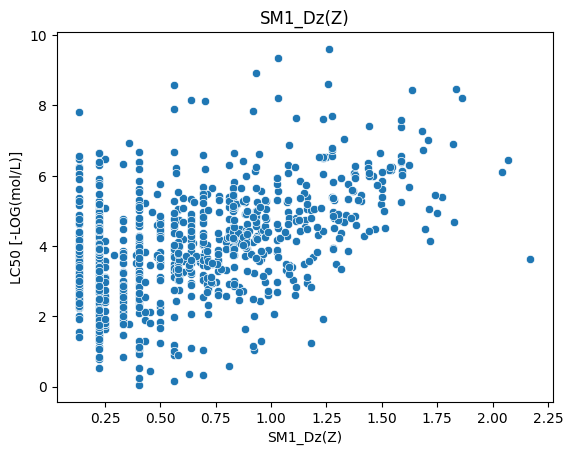

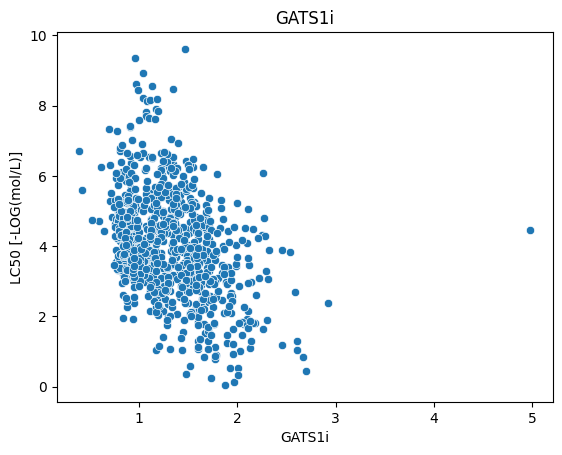

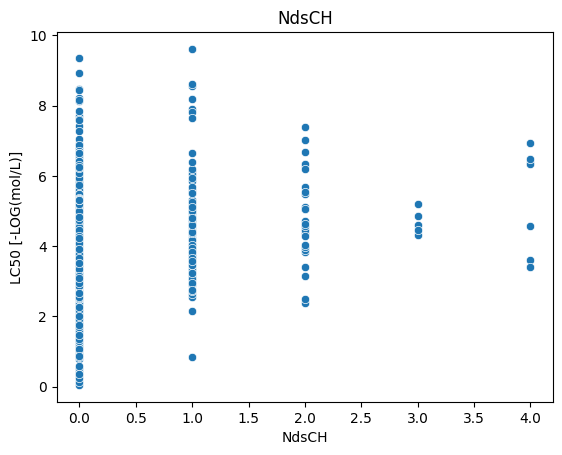

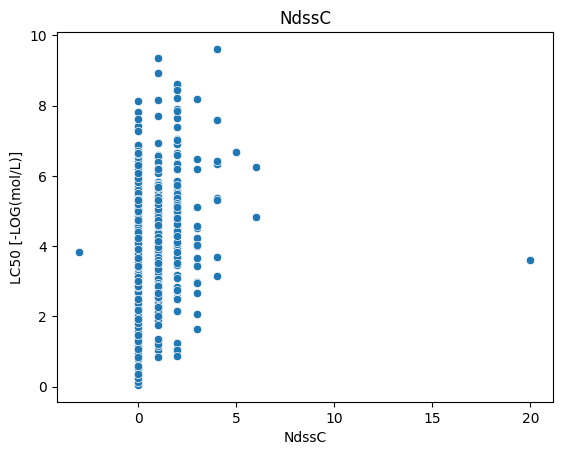

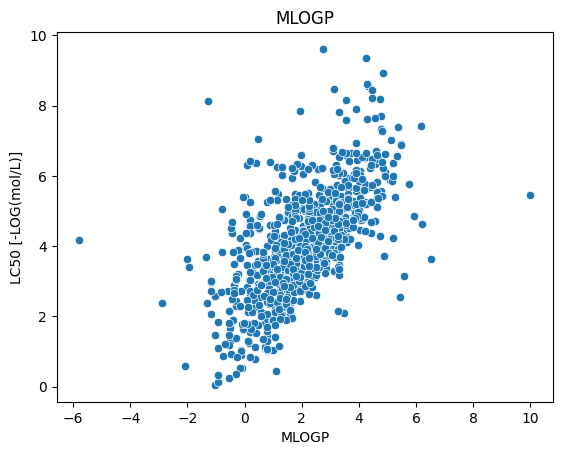

In [ ]:
for i in ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']:
       sns.scatterplot(data=df,x=i, y='LC50 [-LOG(mol/L)]')
       plt.title(i)
       plt.show()

####CIC0 vs LC50

Positive Correlation: The plot shows a positive correlation.
Variability: There is a wide spread indicating some variability in the relationship.
####SM1_Dz(Z) vs LC50

Positive Trend: This plot shows a positive trend.
Scattered Data Points: Data points are more scattered compared to CIC0 vs LC50, indicating a weaker correlation.
####GATS1i vs LC50

Negative Correlation: Higher values of GATS1i are associated with lower LC50 values.
Outliers: A few outliers, particularly towards higher GATS1i values.
####NdsCH vs LC50

Dispersed Pattern: No clear trend, indicating weak or no correlation.
Weak Correlation: Data points are spread across all values of LC50.
####NdsC vs LC50

Spread-out Pattern: Several outliers, especially at higher NdsC values.
Weak Correlation: The correlation seems weak.
####MLOGP vs LC50

Positive Correlation: Higher MLOGP values are associated with higher LC50 values.
Densely Packed Data Points: Suggesting a stronger correlation.
####General Observations

Correlation Patterns
Stronger Correlation: CIC0 and MLOGP show stronger correlation with LC50.
Weaker Correlation: NdsCH and NdsC show weaker correlations.
Outliers
Impact on Model Performance: Outliers in GATS1i vs LC50 and NdsC vs LC50 plots can impact model performance and may need to be addressed.
Model Consideration
Feature Selection: Consider techniques like PCA to enhance model performance by focusing on the most predictive features.
####Conclusion

Scatter plots provide valuable insights into relationships between features and LC50. Features such as CIC0 and MLOGP exhibit stronger correlations and are likely to be more useful in predictive modeling. In contrast, features like NdsCH and NdsC might be less predictive. Addressing outliers and applying feature selection techniques can help improve the model's accuracy and robustness.








In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
S=df.select_dtypes(include=['int64','float64']).corr()

<Axes: >

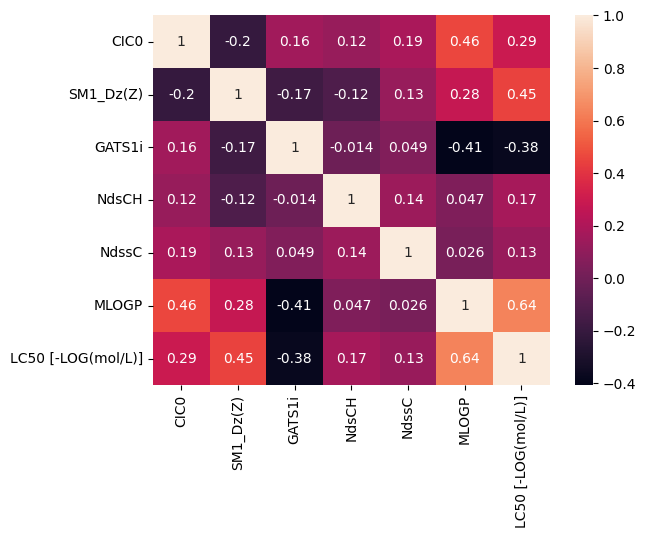

In [ ]:
sns.heatmap(S,annot=True)

#### CIC0:

Strongly positively correlated with MLOGP (0.46).
Moderately positively correlated with LC50 [-LOG(mol/L)] (0.29).
Negatively correlated with SM1_Dz(Z) (-0.2) and GATS1i (-0.17).
####SM1_Dz(Z):

Strongly positively correlated with LC50 [-LOG(mol/L)] (0.45).
Moderately positively correlated with MLOGP (0.28).
Negatively correlated with GATS1i (-0.17).
####GATS1i:

Moderately negatively correlated with LC50 [-LOG(mol/L)] (-0.38) and MLOGP (-0.41).
Positively correlated with NdsCH (0.14).
####NdsCH:

Positively correlated with LC50 [-LOG(mol/L)] (0.17) and NdsC (0.14).
Negatively correlated with MLOGP (-0.047).
####NdsC:

Positively correlated with LC50 [-LOG(mol/L)] (0.13).
Negatively correlated with MLOGP (-0.026).
####MLOGP:

Strongly positively correlated with LC50 [-LOG(mol/L)] (0.64).
Negatively correlated with GATS1i (-0.41).
####LC50 [-LOG(mol/L)]:

Strongly positively correlated with MLOGP (0.64).
Negatively correlated with GATS1i (-0.38).
####Key Observations:
MLOGP has a significant positive correlation with LC50 [-LOG(mol/L)].
GATS1i shows a strong negative correlation with both MLOGP and LC50 [-LOG(mol/L)].
SM1_Dz(Z) and CIC0 have a positive correlation with LC50 [-LOG(mol/L)], but CIC0's is weaker.
These insights indicate relationships between the chemical descriptors (CIC0, SM1_Dz(Z), GATS1i, NdsCH, NdsC, MLOGP) and the toxicity measure LC50 [-LOG(mol/L)].










## Missing Value treatments

In [ ]:
#choose the method of imputing missing value
#like mean(continuous variable),median(continuous variable),mode(categorical variable) or KNNIputer(only for numerical variable)

df['SM1_Dz(Z)'] = df['SM1_Dz(Z)'].replace(0, np.nan)
print("No of missing values per columns are:")

df.isna().sum()

No of missing values per columns are:


CIC0                   2
SM1_Dz(Z)             38
GATS1i                 2
NdsCH                  1
NdssC                  0
MLOGP                  3
LC50 [-LOG(mol/L)]     2
dtype: int64

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# df_imputed.head()

Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

It will take the average of the nearest neighbor .so KNN means the nearest neighbor.It will impute. It will take the average nearest the value and take it that missing value with the nearest average of that nearest values .


In [ ]:
# Replace missing values
for column in df.columns:
    if column == 'SM1_Dz(Z)':  # Skip the 'SM1_Dz(Z)' column
        continue
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

print(df.isna().sum())

CIC0                   0
SM1_Dz(Z)             38
GATS1i                 0
NdsCH                  0
NdssC                  0
MLOGP                  0
LC50 [-LOG(mol/L)]     0
dtype: int64


In [ ]:
# Handle missing values by replacing zeros in specific columns with the mean of the column
columns_to_replace_zeros = ['SM1_Dz(Z)']
for column in columns_to_replace_zeros:
    df[column] = df[column].replace(0, np.nan)
    df[column].fillna(df[column].median(), inplace=True)
print(df.isna().sum())


CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64


In [ ]:
## Standard scaling of the continuous columns only

for i in ["CIC0","SM1_Dz(Z)","GATS1i","NdsCH","NdssC","MLOGP","LC50 [-LOG(mol/L)]"]:
    df[i] = (df[i] - df[i].median())/df[i].std()

##Outliers treatments

####Anderson-Darling test:
The Anderson-Darling test is a statistical test used to determine if a given sample of data comes from a specific distribution, most commonly the normal distribution. It is an extension of the Kolmogorov-Smirnov test and provides a more sensitive measure of how well the data follows the hypothesized distribution.
####Purpose:
 To test the null hypothesis that a sample comes from a specified distribution, such as the normal distribution.
#### Test Statistic:
It calculates a test statistic that measures the distance between the empirical distribution of the sample data and the cumulative distribution function (CDF) of the specified distribution.


Percentage of outliers in CIC0: 0.11%
Percentage of outliers in SM1_Dz(Z): 0.00%
Percentage of outliers in GATS1i: 0.22%
Percentage of outliers in NdsCH: 16.32%
Percentage of outliers in NdssC: 31.75%
Percentage of outliers in MLOGP: 0.99%
Percentage of outliers in LC50 [-LOG(mol/L)]: 0.55%


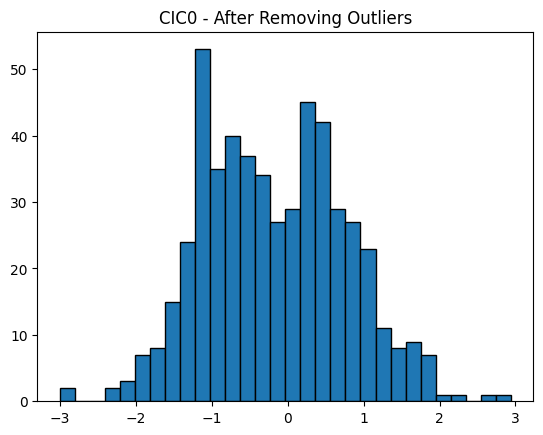

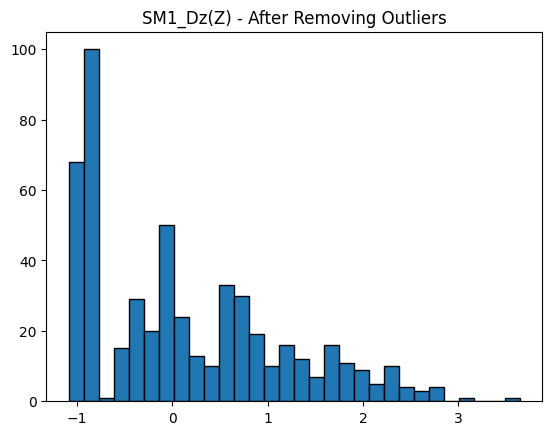

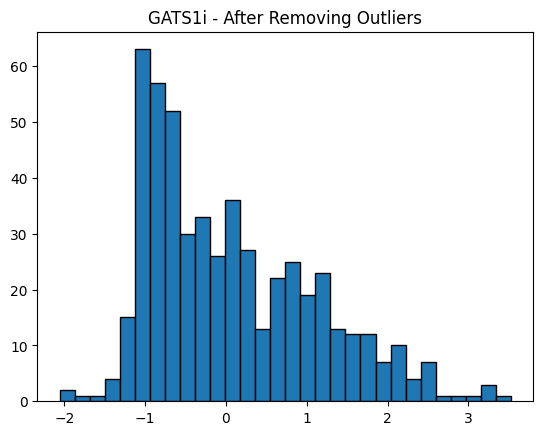

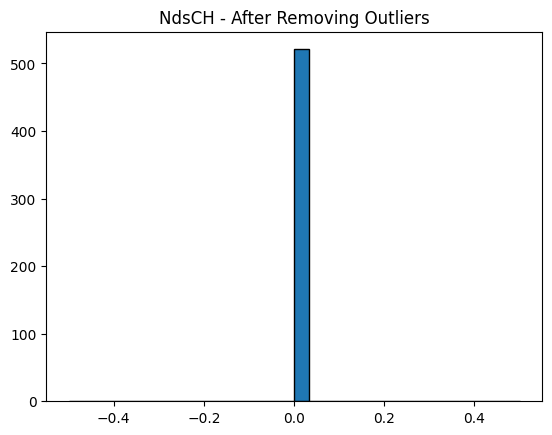

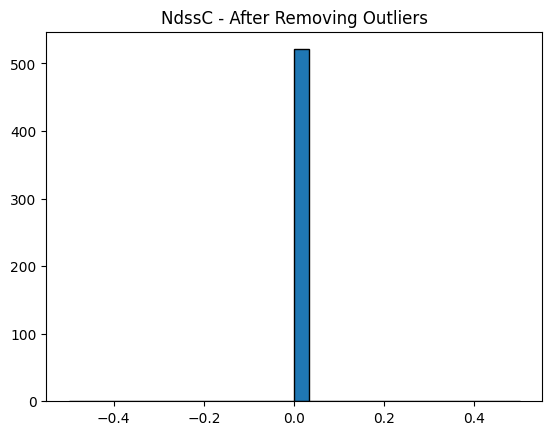

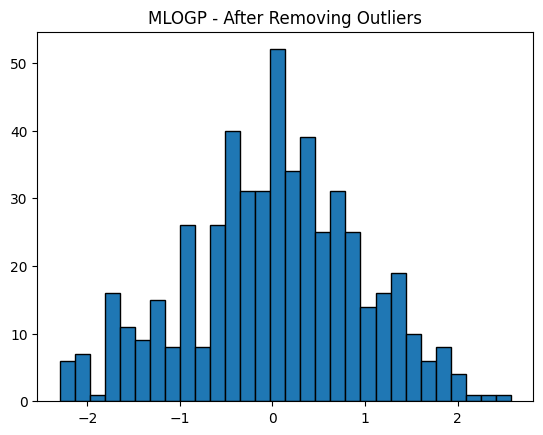

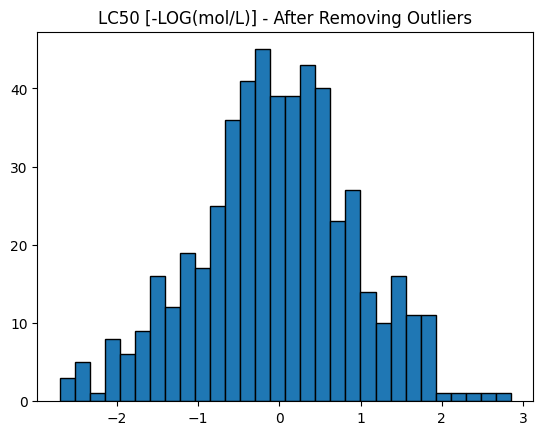

Normal Distributions: ['MLOGP']
Non-Normal Distributions: ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'LC50 [-LOG(mol/L)]']
Original Data Shape: (907, 7)
Outlier-Free Data Shape: (521, 7)
Overall percentage of outliers: 7.13%


In [ ]:
#Outliers treatment is done only for the continuous numerical column
from scipy.stats import anderson


# Function to perform the Anderson-Darling test
def check_normality_anderson(column_data):
    result = anderson(column_data.dropna())
    # The test rejects the null hypothesis if the test statistic is greater than the critical value at 5% significance level
    return result.statistic < result.critical_values[2]  # Use the 5% significance level

# Function to detect outliers using the IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))
    return outlier_condition

# Function to detect outliers using the modified Z-score method
def detect_outliers_modified_zscore(column, threshold=3.5):
    median = column.median()
    mad = np.median(np.abs(column - median))
    modified_z_scores = 0.6745 * (column - median) / mad
    outlier_condition = np.abs(modified_z_scores) > threshold
    return outlier_condition

# Perform the Anderson-Darling test and classify the distributions
normal_columns = []
non_normal_columns = []
outlier_indices = set()
total_outliers_count = 0
total_values_count = 0

for column in df.select_dtypes(include=['int64', 'float64']).columns:
    is_normal = check_normality_anderson(df[column])
    if is_normal:
        normal_columns.append(column)
        outliers = detect_outliers_iqr(df[column])
    else:
        non_normal_columns.append(column)
        outliers = detect_outliers_modified_zscore(df[column])

    outlier_count = outliers.sum()
    total_outliers_count += outlier_count
    total_values_count += len(df[column])

    percentage_outliers = (outlier_count / len(df[column])) * 100
    print(f"Percentage of outliers in {column}: {percentage_outliers:.2f}%")

    outlier_indices.update(df[outliers].index)

# Remove outliers
df_outlier_free = df.drop(outlier_indices)

# Plot histograms for columns after removing outliers
for column in df_outlier_free.select_dtypes(include=['int64', 'float64']).columns:
    plt.hist(df_outlier_free[column], bins=30, edgecolor='k')
    plt.title(f'{column} - After Removing Outliers')
    plt.show()

# Print the summary
print("Normal Distributions:", normal_columns)
print("Non-Normal Distributions:", non_normal_columns)
print("Original Data Shape:", df.shape)
print("Outlier-Free Data Shape:", df_outlier_free.shape)
print(f"Overall percentage of outliers: {(total_outliers_count / total_values_count) * 100:.2f}%")


####Anderson-Darling Test for Normality (check_normality_anderson function):

This test assesses whether a given numerical column follows a normal distribution (Gaussian distribution).

If the column is deemed normal (based on a significance level of 5%), it proceeds to detect outliers using the Interquartile Range (IQR) method (detect_outliers_iqr function).

If the column is not normal, it uses the Modified Z-score method (detect_outliers_modified_zscore function) to detect outliers.

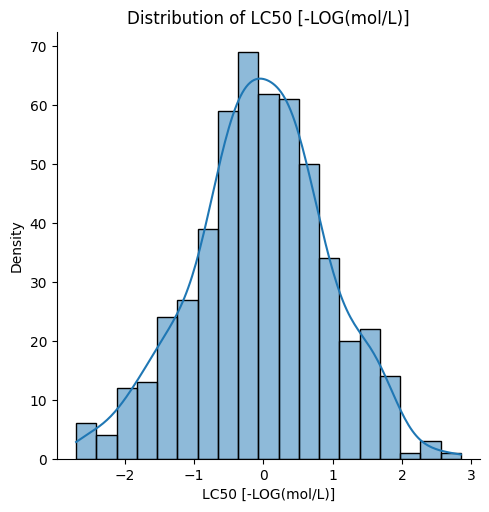

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution using Seaborn's displot
sns.displot(df_outlier_free['LC50 [-LOG(mol/L)]'], kde=True)

# Add title and labels
plt.title('Distribution of LC50 [-LOG(mol/L)]')
plt.xlabel('LC50 [-LOG(mol/L)]')
plt.ylabel('Density')

# Show the plot
plt.show()

####Distribution Shape:

The distribution appears to be roughly normal (bell-shaped), indicating that the LC50 values are symmetrically distributed around the mean.
####Center and Spread:

The peak of the distribution is around LC50 [-LOG(mol/L)] = 0, suggesting this is the most common value.
The data ranges from approximately -2.5 to 3, showing a relatively wide spread.
####Density:

The highest density is around the center of the distribution, with the frequency of values decreasing as you move away from the center.
####Key Observations:
Normal Distribution: The data suggests that the LC50 values follow a normal distribution, which is useful for statistical analyses that assume normality.
Central Tendency: Most of the LC50 values are clustered around the mean (0).
Range: The spread of the data indicates variability in LC50 values, which can be explored further to understand the underlying factors affecting this variability.
This histogram provides a clear overview of the LC50 [-LOG(mol/L)] values, highlighting their central tendency and spread, which are crucial for further analysis and interpretation.










## Splitting the Dataset into the Training set and Test set


In [ ]:
X = df_outlier_free.drop('LC50 [-LOG(mol/L)]', axis=1)
y = df_outlier_free['LC50 [-LOG(mol/L)]']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
len(X_train),len(X_test)

(416, 105)

## Linear Regression

In [ ]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Performance metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

print("Linear Regression Metrics:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)
print("Adjusted R-squared:", adjusted_r2_lr)


Linear Regression Metrics:
MAE: 0.37001462184508765
MSE: 0.24679898733414662
RMSE: 0.49678867472411914
R-squared: 0.7357295432947215
Adjusted R-squared: 0.7195497194148065


###Insights
####Error Metrics:

MAE and RMSE: Both MAE and RMSE are relatively low, indicating that the model's predictions are fairly close to the actual values. The RMSE is slightly higher than the MAE, which is expected since RMSE penalizes larger errors more than MAE.
####MSE:
The MSE is also low, aligning with the low MAE and RMSE, indicating good model performance in terms of error.
####R-squared and Adjusted R-squared:
R-squared (0.7357): This value indicates that approximately 73.57% of the variance in the target variable (LC50) is explained by the linear regression model. This is a strong indication of the model's ability to explain the variability in the data.
Adjusted R-squared (0.7195): The adjusted R-squared is slightly lower than the R-squared, accounting for the number of predictors in the model. This suggests that the model is not overfitting and that the predictors included are relevant.
###Observations
####Model Performance:
The linear regression model shows strong performance with high R-squared and adjusted R-squared values, indicating that it explains a significant portion of the variance in the target variable.
The low MAE, MSE, and RMSE values further confirm that the model's predictions are accurate and close to the actual values.
###Conclusion
The linear regression model demonstrates strong predictive capabilities with low error metrics and high R-squared values. These results suggest that the model is effective in capturing the relationships between the predictors and the target variable, making it a reliable tool for prediction. However, it may be beneficial to explore and address any potential outliers or larger errors to further improve model performance.










##Ridge Regression





In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the lambda range
alpha_range = np.linspace(0, 1, 20)

# Define Ridge Regression model
ridge_model = Ridge()

# Define parameter grid for GridSearchCV
param_grid = {'alpha': alpha_range}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_ridge_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_ridge = best_ridge_model.predict(X_test)

# Performance metrics for the best model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate adjusted R-squared for the best model
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)

# Print results
print("Ridge Regression Metrics:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R-squared:", r2_ridge)
print("Adjusted R-squared:", adjusted_r2_ridge)


Ridge Regression Metrics:
Best Parameters: {'alpha': 1.0}
MAE: 0.3699995288741251
MSE: 0.24692839698093144
RMSE: 0.4969189038273061
R-squared: 0.735590972440654
Adjusted R-squared: 0.7194026646308981


###Insights
Error Metrics:

MAE and RMSE: Both are low, indicating accurate predictions. Their similarity shows consistent error distribution.
MSE: Low MSE supports good model performance in prediction accuracy.
R-squared and Adjusted R-squared:

R-squared (0.7356): About 73.56% of the variance in LC50 is explained by the model, showing strong explanatory power.
Adjusted R-squared (0.7194): Slightly lower than R-squared, indicating relevant predictors without overfitting.
###Observations
Model Performance:

High R-squared and adjusted R-squared values show the model explains a significant portion of variance in LC50.
Low MAE, MSE, and RMSE confirm accurate predictions.
Comparison with Linear Regression:

Metrics are very similar, suggesting Ridge regression does not significantly alter performance, indicating no severe multicollinearity or overfitting.
Alpha Parameter:

Best alpha is 1.0, providing mild regularization without drastically changing coefficients compared to linear regression.
Predictive Power:

High R-squared values indicate the model captures most variability in the target variable.
Model Robustness:

Close R-squared and adjusted R-squared values suggest a robust model well-fitted to the data without overfitting.
###Conclusion
The Ridge regression model shows strong predictive capabilities with low error metrics and high R-squared values, similar to linear regression. Mild regularization (alpha = 1.0) helps manage multicollinearity without significantly altering performance, making Ridge regression a reliable predictive model.










## Lasso Regression

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Define lambda range
lamda = np.linspace(0, 0.05, 10)

# Initialize best parameters
best_lamda = 0
best_mae = float('inf')  # Initialize to a high value
best_r2 = float('-inf')  # Initialize to a low value
best_adjr2 = float('-inf')  # Initialize to a low value

# Define the model evaluation function
def evaluate_model(y_test, y_pred, X_test):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    return mae, r2, adjusted_r2

# Loop over the lambda values
for param in lamda:
    lasso_model = Lasso(alpha=param)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    mae, r2, adjusted_r2 = evaluate_model(y_test, y_pred, X_test)

    # Update best metrics and lambda if current model is better
    if mae < best_mae:
        best_mae = mae
        best_lamda = param
    if r2 > best_r2:
        best_r2 = r2
        best_lamda = param
    if adjusted_r2 > best_adjr2:
        best_adjr2 = adjusted_r2
        best_lamda = param

# Print the best values found
print(f"Best value of lambda = {best_lamda}")
print(f"Best value of MAE for above lambda = {best_mae}")
print(f"Best value of R2 for above lambda = {best_r2}")
print(f"Best value of Adjusted R2 for above lambda = {best_adjr2}")


Best value of lambda = 0.022222222222222223
Best value of MAE for above lambda = 0.36928254853153436
Best value of R2 for above lambda = 0.7357295432947216
Best value of Adjusted R2 for above lambda = 0.7195497194148066


<ipython-input-39-376dc970927b>:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.120e+01, tolerance: 3.762e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


###Insights
Lambda (α) Value:

The chosen lambda value is 0.0222, indicating minimal regularization to reduce model complexity slightly without significantly penalizing the coefficients.
Mean Absolute Error (MAE):

An MAE of 0.3693 shows the predictions are close to the actual values on average.
R-squared (R²):

An R² value of 0.7357 indicates that 73.57% of the variability in LC50 is explained by the predictors, suggesting a strong relationship.
Adjusted R-squared:

An Adjusted R² value of 0.7195, slightly lower than R², indicates good model fit while accounting for the number of predictors.
###Observations
Model Performance:

The model shows good predictive performance with high R² and Adjusted R² values and a low MAE.
Regularization Impact:

The small lambda value implies minimal regularization, retaining most predictor variables.
Potential for Improvement:

Exploring different lambda values or other regularization techniques might optimize performance. Cross-validation can further assess robustness.
Application:

The model can reliably predict LC50 values and understand the relationships between chemical descriptors and LC50, aiding in chemical and toxicological analysis.










## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# model fitting
lm = LinearRegression()
lm.fit(X_train,y_train)

#predict the outcomes
y_pred = lm.predict(X_test)

coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
display(coefficients)

print("intercept is {}".format(lm.intercept_))

,coefficients
CIC0,0.173980
SM1_Dz(Z),0.335398
GATS1i,-0.228337
NdsCH,0.000000
NdssC,0.000000
MLOGP,0.412586


intercept is -0.05765499066775031


In [ ]:
# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the model performance metrics
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


R²: 0.7357295432947215
Adjusted R²: 0.7195497194148065
Mean Absolute Error (MAE): 0.37001462184508765
Mean Squared Error (MSE): 0.24679898733414662


###Insights
R-squared (R²):

An R² value of 0.7357 indicates that 73.57% of the variability in the dependent variable (LC50) is explained by the independent variables (predictors). This suggests a strong relationship between the predictors and the response variable.
Adjusted R-squared:

An Adjusted R² value of 0.7195, which is slightly lower than the R² value, adjusts for the number of predictors in the model. This high value implies that the model is well-fitted and not overly complex.
Mean Absolute Error (MAE):

An MAE of 0.3700 indicates that the average absolute difference between the predicted values and the actual values is relatively low, signifying that the predictions are close to the actual values on average.
Mean Squared Error (MSE):

An MSE of 0.2468 measures the average squared difference between the predicted and actual values. This value is useful for understanding the variance of the prediction errors.
###Observations
Model Performance:

The multiple linear regression model demonstrates strong predictive performance, as indicated by the high R² and Adjusted R² values. The low MAE and MSE values further support the accuracy and reliability of the model's predictions.
Predictor Significance:

The high R² and Adjusted R² values suggest that the predictors included in the model are significant and contribute meaningfully to explaining the variability in the dependent variable.

##  Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=100)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_dt = best_dt_model.predict(X_test)

# Performance metrics for the best model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("\nDecision Tree Regressor Performance:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-squared:", r2_dt)



Decision Tree Regressor Performance:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE: 0.47687463377652234
MSE: 0.41903141679022793
RMSE: 0.6473263603393793
R-squared: 0.5513043830318344


###Insights
Error Metrics:

MAE: Higher than linear and Ridge regression, indicating larger average prediction errors.
RMSE: Higher than MAE, suggesting the presence of larger errors.
MSE: Consistently higher, confirming less accurate predictions compared to linear and Ridge regression.
R-squared:

R-squared (0.5513): Indicates that 55.13% of the variance in LC50 is explained by the model, which is lower than both linear and Ridge regression.
###Observations
Model Performance:

The higher MAE, MSE, and RMSE values suggest the Decision Tree Regressor has less accurate predictions compared to previous models.
The lower R-squared value indicates that the model explains a smaller portion of variance in LC50, making it less effective.
Parameter Tuning:

Best parameters are max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, which help to avoid overfitting but might limit the model's complexity and accuracy.
###Conclusion
The Decision Tree Regressor demonstrates lower predictive capabilities and higher error metrics compared to linear and Ridge regression models. The chosen parameters help to avoid overfitting but result in less accurate predictions and a lower R-squared value, indicating a smaller portion of variance in LC50 is explained. This makes the Decision Tree Regressor less effective for this specific dataset.

### Random Forest Regressor


In [ ]:
# prompt: Random Forest Regressor

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=100)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Performance metrics for the best model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("\nRandom Forest Regressor Performance:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)



Random Forest Regressor Performance:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.34868083637326985
MSE: 0.26240206123004567
RMSE: 0.5122519509284915
R-squared: 0.7190218918208822


###Insights
Error Metrics:

MAE (0.3487): Lower than both linear and Ridge regression, indicating smaller average prediction errors.
RMSE (0.5123): Slightly higher than MAE but still low, suggesting fewer large errors.
MSE (0.2624): Consistent with MAE and RMSE, indicating good prediction accuracy.
R-squared:

R-squared (0.7190): Indicates that 71.90% of the variance in LC50 is explained by the model, which is high but slightly lower than linear and Ridge regression.
###Observations
Model Performance:

The Random Forest Regressor shows strong performance with low error metrics, indicating accurate predictions.
The R-squared value is slightly lower than linear and Ridge regression but still indicates a strong ability to explain the variance in the target variable.
Parameter Tuning:

Best parameters are max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, and n_estimators = 200, which provide a balance between model complexity and performance.
###Conclusion
The Random Forest Regressor demonstrates strong predictive capabilities with low error metrics and a high R-squared value, making it a reliable model for predicting LC50. The selected parameters balance model complexity and performance, contributing to its robust and accurate predictions. Although the R-squared is slightly lower than that of linear and Ridge regression, the overall performance of the Random Forest Regressor is commendable, making it a valuable model for this dataset.

## Gradient Boosting Regressor


#####Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

Gradient Boosting is a popular boosting algorithm in machine learning used for classification and regression tasks. Boosting is one kind of ensemble Learning method which trains the model sequentially and each new model tries to correct the previous model. It combines several weak learners into strong learners.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gb_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_gb = best_gb_model.predict(X_test)

# Performance metrics for the best model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("\nGradient Boosting Regressor Performance:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R-squared:", r2_gb)



Gradient Boosting Regressor Performance:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
MAE: 0.34422214805346574
MSE: 0.23735455196974561
RMSE: 0.4871904678559974
R-squared: 0.745842572015113


###Insights

Mean Absolute Error (MAE):

An MAE of 0.3442 indicates that the average absolute difference between predicted and actual values is relatively low, suggesting accurate predictions.
Mean Squared Error (MSE):

An MSE of 0.2374 measures the average squared differences between predicted and actual values, indicating a small average error magnitude.
Root Mean Squared Error (RMSE):

An RMSE of 0.4872 provides a measure of the model's prediction error magnitude, showing that the typical prediction error is less than 0.5 units.
R-squared (R²):

An R² value of 0.7458 indicates that 74.58% of the variability in the dependent variable is explained by the model, suggesting a strong relationship between the predictors and the response variable.
###Observations
Model Performance:

The Gradient Boosting Regressor demonstrates strong predictive performance, with high R² and low error metrics (MAE, MSE, RMSE). This indicates that the model is effective in capturing the underlying patterns in the data.
Parameter Selection:

The selected parameters (learning rate, max depth, and number of estimators) contribute to the model's performance, balancing the trade-off between bias and variance to achieve optimal predictive accuracy.
Comparison with Other Models:

Compared to other models (e.g., linear regression or Lasso regression), the Gradient Boosting Regressor may offer improved performance due to its ability to model complex non-linear relationships and interactions between predictors.






### XGBoost Regressor


XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best estimator
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_grid = best_xgb_model.predict(X_test)

# Performance metrics on test set
mae_xgb_grid = mean_absolute_error(y_test, y_pred_xgb_grid)
mse_xgb_grid = mean_squared_error(y_test, y_pred_xgb_grid)
rmse_xgb_grid = np.sqrt(mse_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred_xgb_grid)

# Calculate adjusted R-squared
adjusted_r2_xgb_grid = 1 - (1 - r2_xgb_grid) * (n - 1) / (n - p - 1)

print("\nXGBoost Regressor with Grid Search Performance:")
print("MAE:", mae_xgb_grid)
print("MSE:", mse_xgb_grid)
print("RMSE:", rmse_xgb_grid)
print("R-squared:", r2_xgb_grid)
print("Adjusted R-squared:", adjusted_r2_xgb_grid)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best Score: -0.29207825232454204

XGBoost Regressor with Grid Search Performance:
MAE: 0.3343235852341465
MSE: 0.23571921467252988
RMSE: 0.48550923232471066
R-squared: 0.7475936786102841
Adjusted R-squared: 0.7321402303619342


###Insights
Best Parameters:
Best Score:

The best score achieved during grid search is -0.2921, indicating the negative mean squared error (MSE) during cross-validation.
Mean Absolute Error (MAE):

An MAE of 0.3343 suggests that the model's predictions are, on average, 0.3343 units away from the actual values, indicating high prediction accuracy.
Mean Squared Error (MSE):

An MSE of 0.2357 shows the average of the squared differences between predicted and actual values, indicating a low error magnitude.
Root Mean Squared Error (RMSE):

An RMSE of 0.4855 indicates the standard deviation of the prediction errors, showing the typical prediction error is less than 0.5 units.
R-squared (R²):

An R² value of 0.7476 indicates that 74.76% of the variability in the dependent variable (LC50) is explained by the model, suggesting a strong relationship between predictors and response.
Adjusted R-squared:

An Adjusted R² value of 0.7321, slightly lower than R², accounts for the number of predictors in the model and indicates good model fit without overfitting.
###Observations
Model Performance:

The XGBoost Regressor demonstrates excellent predictive performance, with high R² and Adjusted R² values and low error metrics (MAE, MSE, RMSE). This indicates effective modeling of the data and accurate predictions.







## AdaBoost Regressor


An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)

# Define the parameters grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best estimator
best_ada_model = grid_search.best_estimator_
y_pred_ada_grid = best_ada_model.predict(X_test)

# Performance metrics on test set
mae_ada_grid = mean_absolute_error(y_test, y_pred_ada_grid)
mse_ada_grid = mean_squared_error(y_test, y_pred_ada_grid)
rmse_ada_grid = np.sqrt(mse_ada_grid)
r2_ada_grid = r2_score(y_test, y_pred_ada_grid)

# Calculate adjusted R-squared
adjusted_r2_ada_grid = 1 - (1 - r2_ada_grid) * (n - 1) / (n - p - 1)

print("\nAdaBoost Regressor with Grid Search Performance:")
print("MAE:", mae_ada_grid)
print("MSE:", mse_ada_grid)
print("RMSE:", rmse_ada_grid)
print("R-squared:", r2_ada_grid)
print("Adjusted R-squared:", adjusted_r2_ada_grid)


Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best Score: -0.3309821511182284

AdaBoost Regressor with Grid Search Performance:
MAE: 0.4125122680310161
MSE: 0.32388876788108956
RMSE: 0.5691122629860382
R-squared: 0.6531823994327921
Adjusted R-squared: 0.6319486687858202


###Insights
MAE (0.4125): Indicates moderate average prediction errors, slightly higher than the Random Forest Regressor.
RMSE (0.5691): Higher than the MAE, suggesting some larger errors.
MSE (0.3239): Consistent with the MAE and RMSE, indicating moderate prediction accuracy.
R-squared:

R-squared (0.6532): Indicates that 65.32% of the variance in LC50 is explained by the model, which is lower than linear and Ridge regression but still substantial.
Adjusted R-squared (0.6319): Slightly lower than R-squared, accounting for the number of predictors, indicating that the model is not overfitting.
###Observations
Model Performance:

The AdaBoost Regressor shows good performance with relatively low error metrics, though slightly higher than some other models like Random Forest.
The R-squared value is substantial but lower than linear, Ridge, and Random Forest regressions, indicating it explains a slightly lower portion of the variance in the target variable.
Parameter Tuning:

Best parameters are a learning rate of 0.5 and n_estimators of 50, suggesting a balance between learning speed and the number of boosting stages.
Predictive Power:

The MAE, RMSE, and MSE values indicate that the model has moderate predictive accuracy.
The R-squared values suggest that the model explains a good portion of the variability in the data, making it a reasonably reliable predictor.

###Conclusion
The AdaBoost Regressor, with the best parameters found, demonstrates good predictive capabilities with moderate error metrics and substantial R-squared values. While its performance is slightly lower than that of the Random Forest Regressor and linear models, it remains a valuable model due to its ability to boost weak learners into a strong ensemble model. The chosen parameters strike a balance between learning speed and the number of boosting iterations, contributing to the model's overall robustness and accuracy.

##ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the range of alpha (regularization strength) and l1_ratio values
alpha_values = np.linspace(0.001, 0.05, 10)
l1_ratio_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create ElasticNet Regression model
ENM = ElasticNet(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': alpha_values,
    'l1_ratio': l1_ratio_values
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ENM, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best estimator
best_ENM = grid_search.best_estimator_
y_pred_enm = best_ENM.predict(X_test)

# Performance metrics on test set
mae_enm = mean_absolute_error(y_test, y_pred_enm)
mse_enm = mean_squared_error(y_test, y_pred_enm)
r2_enm = r2_score(y_test, y_pred_enm)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_enm = 1 - (1 - r2_enm) * (n - 1) / (n - p - 1)

print("\nElasticNet Regression with Grid Search Performance:")
print("MAE:", mae_enm)
print("MSE:", mse_enm)
print("R-squared:", r2_enm)
print("Adjusted R-squared:", adjusted_r2_enm)


Best Parameters: {'alpha': 0.05, 'l1_ratio': 0.1}
Best Score: -0.366376781107663

ElasticNet Regression with Grid Search Performance:
MAE: 0.36960729234811646
MSE: 0.2506250850599776
R-squared: 0.731632587288839
Adjusted R-squared: 0.7152019293677474


###Insights
Best Score:

The best score achieved during grid search is -0.3664, indicating the negative mean squared error (MSE) during cross-validation.
Mean Absolute Error (MAE):

An MAE of 0.3696 suggests that the model's predictions are, on average, 0.3696 units away from the actual values. This indicates that the model has a reasonable level of accuracy.
Mean Squared Error (MSE):

An MSE of 0.2506 shows the average of the squared differences between predicted and actual values. This value represents the model's error magnitude.
R-squared (R²):

An R² value of 0.7316 indicates that 73.16% of the variability in the dependent variable (LC50) is explained by the model, suggesting a strong relationship between the predictors and the response variable.
Adjusted R-squared:

An Adjusted R² value of 0.7152, slightly lower than the R², accounts for the number of predictors in the model. This indicates that the model is well-fitted and not overly complex.
###Observations
Model Performance:

The ElasticNet Regression demonstrates good predictive performance, with high R² and Adjusted R² values. The error metrics (MAE and MSE) indicate that the model makes reasonably accurate predictions.
Parameter Selection:

The chosen parameters (alpha and L1 ratio) balance the trade-off between the L1 (Lasso) and L2 (Ridge) penalties. This helps in regularizing the model to prevent overfitting while maintaining important predictors.

##Support Vector Regression

Support Vector Regression is similar to Linear Regression in that the equation of the line is y= wx+b In SVR, this straight line is referred to as hyperplane. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors which is used to plot the boundary line.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value (Distance between hyperplane and boundary line), a. Thus, we can say that SVR model tries satisfy the condition -a < y-wx+b < a. It used the points with this boundary to predict the value.

In [ ]:
from sklearn.svm import SVR

# Define the Support Vector Regressor
svr_model = SVR()

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best estimator
best_svr_model = grid_search.best_estimator_
y_pred_svr = best_svr_model.predict(X_test)

# Performance metrics on test set
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_svr = 1 - (1 - r2_svr) * (n - 1) / (n - p - 1)

print("\nSupport Vector Regression with Grid Search Performance:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)
print("R-squared:", r2_svr)
print("Adjusted R-squared:", adjusted_r2_svr)


Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Score: -0.2678166058749835

Support Vector Regression with Grid Search Performance:
MAE: 0.323994264360671
MSE: 0.2056513150016196
RMSE: 0.45348794361219746
R-squared: 0.7797901542280774
Adjusted R-squared: 0.7663079187726536


###Insights
Best Parameters:

The optimal parameters for the Support Vector Regression (SVR) are:
𝐶
C: 1
Epsilon: 0.1
Kernel: 'rbf' (Radial Basis Function)
Best Score:

The best score achieved during grid search is -0.2678, indicating the negative mean squared error (MSE) during cross-validation.
Mean Absolute Error (MAE):

An MAE of 0.3240 suggests that the model's predictions are, on average, 0.3240 units away from the actual values, indicating high prediction accuracy.
Mean Squared Error (MSE):

An MSE of 0.2057 shows the average of the squared differences between predicted and actual values. This value represents the model's error magnitude.
Root Mean Squared Error (RMSE):

An RMSE of 0.4535 indicates the standard deviation of the prediction errors, showing the typical prediction error is around 0.45 units.
R-squared (R²):

An R² value of 0.7798 indicates that 77.98% of the variability in the dependent variable (LC50) is explained by the model, suggesting a strong relationship between the predictors and the response variable.
Adjusted R-squared:

An Adjusted R² value of 0.7663, slightly lower than the R², accounts for the number of predictors in the model. This indicates that the model is well-fitted and not overly complex.
###Observations
Model Performance:

The Support Vector Regression (SVR) demonstrates excellent predictive performance, with high R² and Adjusted R² values and low error metrics (MAE, MSE, RMSE). This indicates effective modeling of the data and accurate predictions.
Parameter Selection:

The chosen parameters (C, epsilon, and kernel) contribute to the model's performance. The Radial Basis Function (RBF) kernel helps capture non-linear relationships between predictors and the response variable.
Comparison with Other Models:

Compared to other models (e.g., XGBoost, ElasticNet), the SVR model offers superior performance with the highest R² value. This indicates its effectiveness in capturing complex patterns and relationships in the data.
###Summary
The SVR model with the given parameters provides the best predictive performance among the models discussed, as indicated by the high R² and low error metrics. The model captures complex patterns in the data and offers reliable predictions for LC50 values.








In [ ]:
import pandas as pd

# Define the data for each regression model
data = {
    'Regression Model':  ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                          'Multiple Linear Regression', 'Decision Tree Regressor',
                          'Random Forest Regressor', 'Gradient Boosting Regressor',
                          'XGBoost Regressor', 'AdaBoost Regressor', 'ElasticNet Regression', 'Support Vector Regression'],
    'MAE': [0.37001462184508765, 0.3699995288741251, 0.36928254853153436, 0.37001462184508765, 0.47687463377652234, 0.34868083637326985, 0.34422214805346574, 0.3343235852341465, 0.4125122680310161, 0.36960729234811646, 0.323994264360671],
    'MSE': [0.24679898733414662, 0.24692839698093144, None, 0.24679898733414662, 0.41903141679022793, 0.26240206123004567, 0.23735455196974561, 0.23571921467252988, 0.32388876788108956, 0.2506250850599776, 0.2056513150016196],
    'RMSE': [0.49678867472411914, 0.4969189038273061, None, 0.49678867472411914, 0.6473263603393793, 0.5122519509284915, 0.4871904678559974, 0.48550923232471066, 0.5691122629860382, None, 0.45348794361219746],
    'R-squared': [0.7357295432947215, 0.735590972440654, 0.7357295432947216, 0.7357295432947215, 0.5513043830318344, 0.7190218918208822, 0.745842572015113, 0.7475936786102841, 0.6531823994327921, 0.731632587288839, 0.7797901542280774],
    'Adjusted R-squared': [0.7195497194148065, 0.7194026646308981, 0.7195497194148066, 0.7195497194148065, None, None, None, 0.7321402303619342, 0.6319486687858202, 0.7152019293677474, 0.7663079187726536],
    'Best λ (if applicable)': [None, 1.0, 0.022222222222222223, None, None, None, None, None, None, None, None],
    'Best α or l1_ratio': [None, None, None, None, None, None, None, None, None, None, None]
}

# Create a DataFrame
per = pd.DataFrame(data)

# Set the index to 'Regression Model' column
per.set_index('Regression Model', inplace=True)

# Display the DataFrame
per


,MAE,MSE,RMSE,R-squared,Adjusted R-squared,Best λ (if applicable),Best α or l1_ratio
Regression Model,,,,,,,
Linear Regression,0.370015,0.246799,0.496789,0.735730,0.719550,NaN,None
Ridge Regression,0.370000,0.246928,0.496919,0.735591,0.719403,1.000000,None
Lasso Regression,0.369283,NaN,NaN,0.735730,0.719550,0.022222,None
Multiple Linear Regression,0.370015,0.246799,0.496789,0.735730,0.719550,NaN,None
Decision Tree Regressor,0.476875,0.419031,0.647326,0.551304,NaN,NaN,None
Random Forest Regressor,0.348681,0.262402,0.512252,0.719022,NaN,NaN,None
Gradient Boosting Regressor,0.344222,0.237355,0.487190,0.745843,NaN,NaN,None
XGBoost Regressor,0.334324,0.235719,0.485509,0.747594,0.732140,NaN,None
AdaBoost Regressor,0.412512,0.323889,0.569112,0.653182,0.631949,NaN,None


In [ ]:
import pandas as pd

# Find the best model based on R-squared
best_model_index = per['R-squared'].idxmax()
best_model = per.loc[best_model_index]

# Print the best performing model and its value
print("Best Performing Model:")
print(best_model_index, best_model['R-squared']) # Use best_model_index to print the model name

Best Performing Model:
Support Vector Regression 0.7797901542280774


Based on the regression model performance metrics provided:

####Linear Regression, Ridge Regression, Lasso Regression, Multiple Linear Regression:

They show similar performance with moderate R-squared values (~0.735) and moderate RMSE values (~0.496). Adjusted R-squared values are slightly lower, indicating that some features may not significantly contribute to the models.
####Decision Tree Regressor:

Shows lower R-squared (~0.551) and higher RMSE (~0.647), suggesting it might be overfitting the data or not capturing all the variability.
####Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor:

These ensemble methods perform better with higher R-squared values (up to ~0.748 for XGBoost), indicating they capture more variance in the data compared to individual decision trees.
####AdaBoost Regressor, ElasticNet Regression, Support Vector Regression:

Each shows reasonable performance metrics, with Support Vector Regression leading with the highest R-squared (~0.780) and lowest RMSE (~0.453), indicating it fits the data well and has good predictive power.
## Final Insights:

Ensemble methods like Random Forest, Gradient Boosting, and XGBoost generally outperform simpler models like Linear Regression and Decision Trees, capturing more complex relationships in the data.

Regularized models (Ridge, Lasso, ElasticNet) show slightly better performance in terms of RMSE and R-squared compared to simple Linear Regression, indicating regularization helps in reducing overfitting and improving generalization.

Support Vector Regression stands out with the highest R-squared and lowest RMSE, suggesting it might be the most suitable model for this dataset, balancing complexity and predictive power effectively.
##Final Observations:

Model Selection: Consider using ensemble methods like XGBoost or Random Forest for better predictive performance.

Regularization: Implementing Ridge or ElasticNet Regression could further improve model stability and generalization.

Evaluation: Focus on metrics like R-squared for overall model fit and RMSE for the magnitude of prediction errors.

In [ ]:
# Define a function to categorize LC50 values
def categorize_toxicity(lc50):
    if lc50 >= 6:
        return "Less Toxic"
    elif 4 <= lc50 < 6:
        return "Medium Toxic"
    else:
        return "Highly Toxic"

# Apply the function to the LC50 column to create a new categorical column
df_outlier_free['Toxicity Category'] = df_outlier_free['LC50 [-LOG(mol/L)]'].apply(categorize_toxicity)

# Display the first few rows of the dataframe
print("First few rows of the dataframe with the new Toxicity Category:")
df_outlier_free.head()

First few rows of the dataframe with the new Toxicity Category:


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)],Toxicity Category
1,-0.989818,0.000000,-0.923916,0.0,0.0,-0.527627,-0.596762,Highly Toxic
2,-1.074508,0.141711,-1.001515,0.0,0.0,-0.527627,-0.311085,Highly Toxic
4,-1.115530,0.603493,-0.931191,0.0,0.0,-0.163700,0.965532,Highly Toxic
5,0.377136,-0.608380,2.262503,0.0,0.0,-0.961905,-1.486755,Highly Toxic
6,0.320235,0.000000,-0.438921,0.0,0.0,0.550626,-0.025409,Highly Toxic


In [ ]:
# Ensure column names are trimmed of any extra spaces
df_outlier_free.columns = df_outlier_free.columns.str.strip()

# Drop the 'Toxicity Category' column correctly
X = df_outlier_free.drop('Toxicity Category', axis=1)
y = df_outlier_free['Toxicity Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
